# Линейная регрессия

# Задание 1

Считайте файл weights_heights.csv

In [9]:
import pandas as pd

df = pd.read_csv(r"D:\weights_heights.csv")

C:\Users\Екатерина\AppData\Local\Temp\ipykernel_11260\559626172.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Выведите первые 10 строк датафрейма. Выведите размер датафрейма

In [3]:
df.head(10)

,Height,Weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971
5,68.69784,123.3024
6,69.80204,141.4947
7,70.01472,136.4623
8,67.90265,112.3723
9,66.78236,120.6672


In [7]:
print(f'Размер датафрейма {df.size}')

Размер датафрейма 50000


### Разобьем данные на тренировочную и тестовую выборки

In [124]:
from sklearn.model_selection import train_test_split

X = df[['Height']] # матрица объект-признак. Обычно признаков > 1
y = df['Weight'] # вектор целевой переменной

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [9]:
X.shape

(25000, 1)

# Проверим, как работает функция линейной регрессии из sklearn

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

model.fit(Xtrain, ytrain) # обучение модели

coef = float(model.coef_) # веса при признаках
intercept = model.intercept_ # свободный коэффициент (w0)
print(f'''
Вес при признаке "рост": {coef:.3f},
Свободный коэффициент:  {intercept:.3f}''')


Вес при признаке "рост": 3.067,
Свободный коэффициент:  -81.444


C:\Users\Екатерина\AppData\Local\Temp\ipykernel_11260\3116530535.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  coef = float(model.coef_) # веса при признаках


$ Weight = w_0 + w_1\cdot Height$

$ Weight = -83 + 3\cdot Height$

Возьмите любую пару рост и вес из датафрейма. Проверьте, что если подставить их в нашу формулу, получится что-то похожее

In [12]:
h = df['Height'][556]
w = df['Weight'][556]
print(f'Height: {h}\nWeight: {w}')

Height: 67.64085
Weight: 127.8407


In [13]:
w = -82.362 + 3.080 * h
w

125.97181800000001

In [15]:
intercept + h * coef

125.98041729855316

In [16]:
pred_test = model.predict(Xtest) # делаем предсказание

mean_squared_error(pred_test, ytest) ** 0.5 # ошибка примерно 10 фунтов

10.085521395467657

In [17]:
pred_train = model.predict(Xtrain)

mean_squared_error(pred_train, ytrain) ** 0.5

10.07752576517272

Модель не переобучена. Как мы это поняли?

### Это тот редкий случай, когда мы можем изобразить график с линейной регрессией.

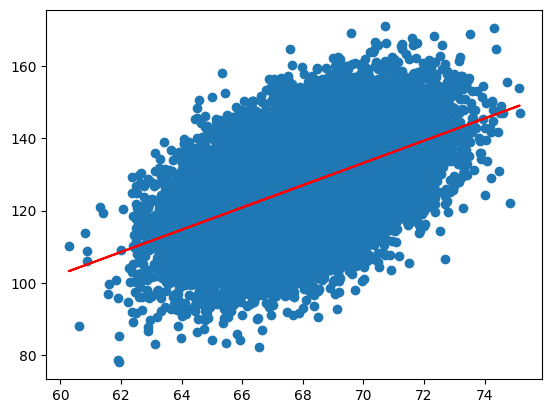

In [12]:
from matplotlib import pylab as plt
%matplotlib inline

plt.scatter(df['Height'], df['Weight'])

plt.plot(X, coef * X + intercept, 'r')

# Задание 2

Поработаем с датасетом Бостон.

In [13]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [14]:
X_full = data.data
y_full = data.target

Разбейте данные на train и test. Обучите линейную регрессию на train и сделайте предсказание на train и test.

In [17]:
# your code here
Xtrain, Xtest, ytrain, ytest = train_test_split(X_full, y_full, test_size=0.2)

model = LinearRegression()
model.fit(Xtrain, ytrain) # обучение модели
pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)

Выведите MSE на train и на test. Выведите RMSE. На сколько в среднем мы ошибаемся на train и test? Модель переобучена, недообучена или все ок?

In [18]:
mean_squared_error(pred_test, ytest) ** 0.5 

0.7199339826618442

In [19]:
mean_squared_error(pred_test, ytest)

0.5183049393913445

In [20]:
mean_squared_error(pred_train, ytrain) ** 0.5

0.7252446552337339

In [21]:
mean_squared_error(pred_train, ytrain)
#Модель переобучена: ошибается на очень маленькое значение.

0.5259798099450975

Нарисуем матрицу корреляций признаков.

<Axes: >

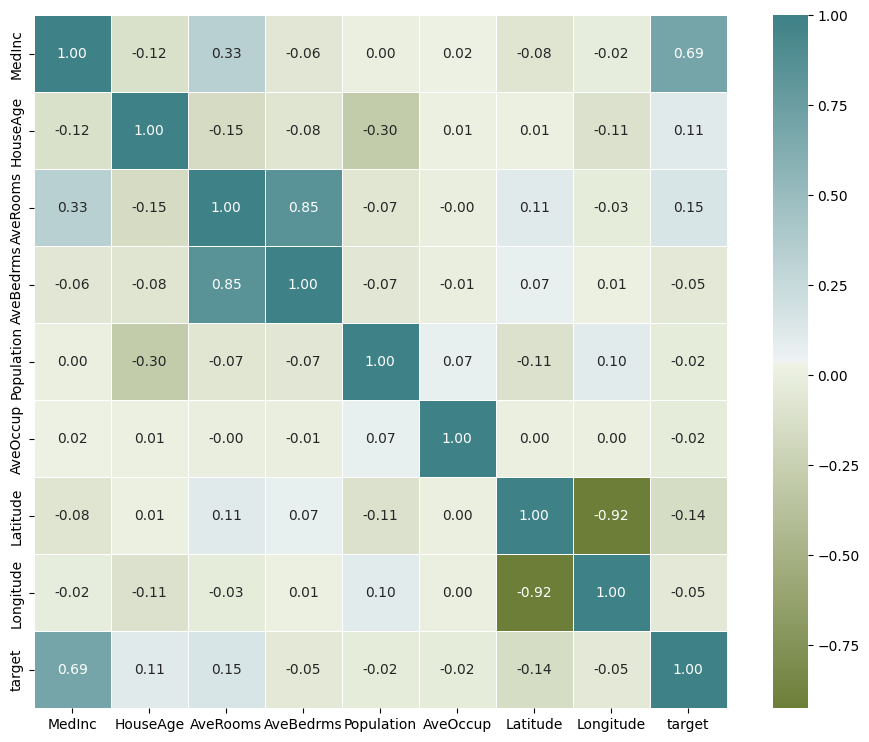

In [23]:
import seaborn as sns
import numpy as np

data1 = pd.DataFrame(data=np.c_[data['data'], data['target']],
                     columns=list(data['feature_names']) + ['target'])

plt.figure(figsize=(12,9))

corr = data1.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)

In [27]:
data1.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


Мы можем удалять признаки

In [40]:
del data1['AveRooms']

Создавать новые из уже существующих

In [41]:
data1['NEW'] = data1['AveOccup'] ** 2

Посмотрим на новую матрицу объект-признак

In [42]:
y = data1['target']

X = data1.drop('target', axis=1)

X.head()

,MedInc,HouseAge,AveBedrms,Population,AveOccup,Latitude,Longitude,NEW
0,8.3252,41.0,1.023810,322.0,2.555556,37.88,-122.23,6.530864
1,8.3014,21.0,0.971880,2401.0,2.109842,37.86,-122.22,4.451433
2,7.2574,52.0,1.073446,496.0,2.802260,37.85,-122.24,7.852660
3,5.6431,52.0,1.073059,558.0,2.547945,37.85,-122.25,6.492025
4,3.8462,52.0,1.081081,565.0,2.181467,37.85,-122.25,4.758799


In [43]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(Xtrain, ytrain) # обучение модели
pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)
print(mean_squared_error(pred_test, ytest) ** 0.5, mean_squared_error(pred_train, ytrain) ** 0.5)

0.7364618269332013 0.7267082711824225


Можем изучить каждый признак в отдельности, изучить его распределение с ЦП

MedInc


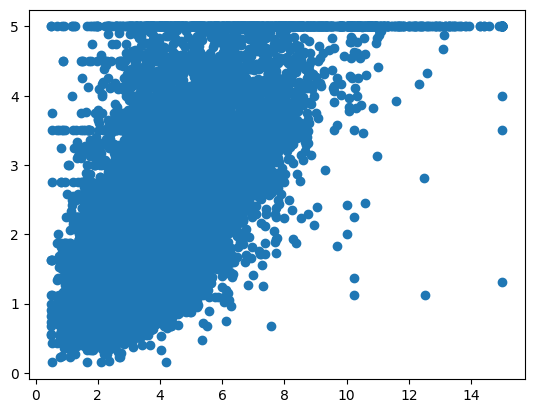

HouseAge


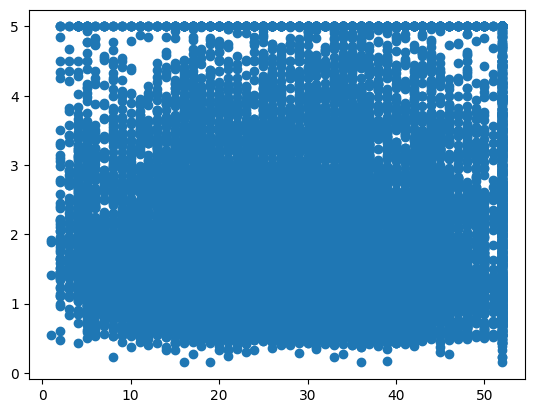

AveBedrms


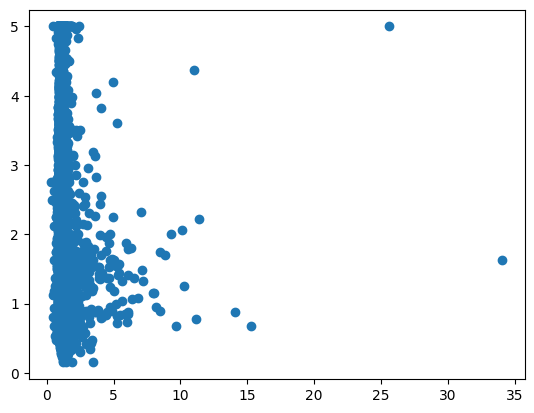

Population


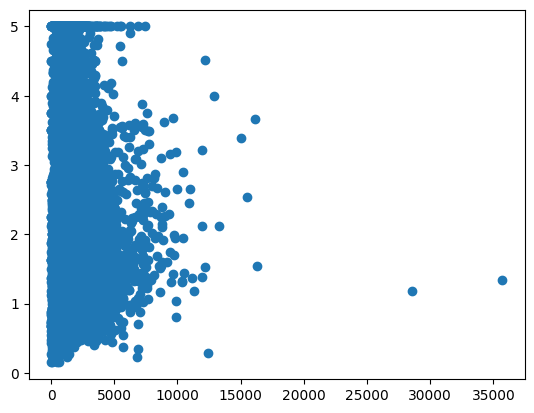

AveOccup


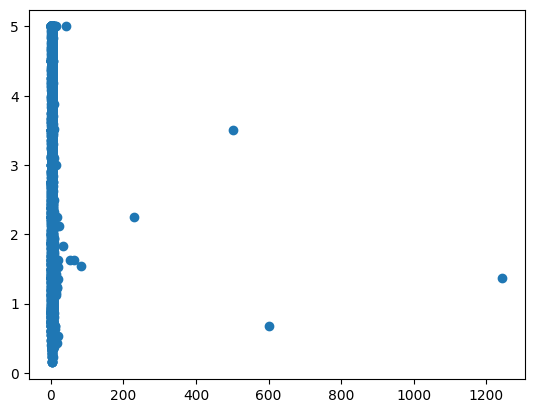

Latitude


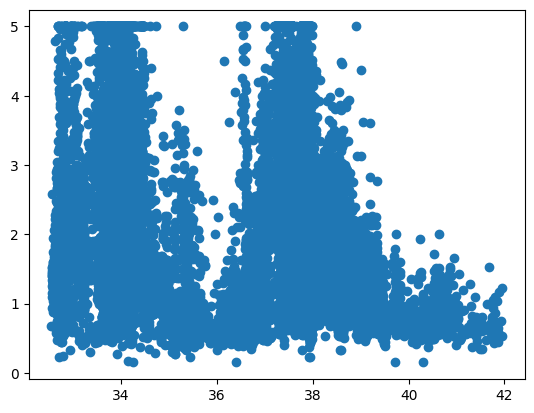

Longitude


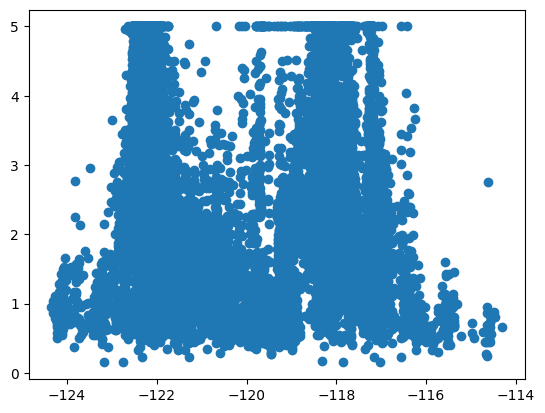

NEW


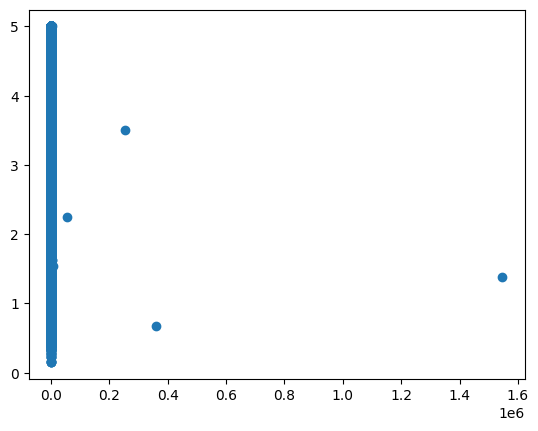

In [46]:
for c in data1.columns:
    if c != 'target':
        print(c)
        plt.scatter(data1[c], data1['target'])
        plt.show()

Попробуйте убрать из данных признаки с наименьшей корреляцией с target (1, 2 или 3 признака) и обучить линейную регрессию на оставшихся признаках. Как изменилось качество?

In [32]:
data1 = pd.DataFrame(data=np.c_[data['data'], data['target']],
                     columns=list(data['feature_names']) + ['target'])

data1.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [34]:
data1.drop(['Longitude', 'AveBedrms', 'AveOccup'], axis=1, inplace=True)
data1.head()

KeyError: "['Longitude', 'AveBedrms', 'AveOccup'] not found in axis"

In [35]:
data1.head()

,MedInc,HouseAge,AveRooms,Population,Latitude,target
0,8.3252,41.0,6.984127,322.0,37.88,4.526
1,8.3014,21.0,6.238137,2401.0,37.86,3.585
2,7.2574,52.0,8.288136,496.0,37.85,3.521
3,5.6431,52.0,5.817352,558.0,37.85,3.413
4,3.8462,52.0,6.281853,565.0,37.85,3.422


In [36]:
y = data1['target']

X = data1.drop('target', axis=1)

X.head()

,MedInc,HouseAge,AveRooms,Population,Latitude
0,8.3252,41.0,6.984127,322.0,37.88
1,8.3014,21.0,6.238137,2401.0,37.86
2,7.2574,52.0,8.288136,496.0,37.85
3,5.6431,52.0,5.817352,558.0,37.85
4,3.8462,52.0,6.281853,565.0,37.85


In [37]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(Xtrain, ytrain) # обучение модели
pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)
print(mean_squared_error(pred_test, ytest) ** 0.5, mean_squared_error(pred_train, ytrain) ** 0.5) #обе погрешности увеличились(

0.8048641301257422 0.7989629867619744


# Задание 3. 

Откроем новый датасет Clean\_Dataset.csv: в нем собрана информация про полеты и их цены. Поработайте с признаками: какие-то проще будет отбросить, какие-то понадобится превратить из категориальных в числовые. 

Обучите линейную регрессию. 

In [102]:
data = pd.read_csv(r"D:\Clean_Dataset.csv")
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [103]:
data.rename(columns={'class':'Class'}, inplace=True) #следующая ячейка ругалась, когда с маленькой буквы было
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,Class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [104]:
set(data.Class)

{'Business', 'Economy'}

In [105]:
missing_values = data.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]/data.shape[0]
print(f'{missing_values *100} %')

Series([], dtype: float64) %


In [87]:
data.Class = data.Class.apply(lambda x: 1 if 'Business' else 0) 
#я сначала посмотрела все значения классах, там было "Business" и "Economy", но почему-то все в итоге заменяется на одну и ту же цифру, не поняла, что не так, и сделала через функцию

In [106]:
def number_class(classes):
    dct = {'Economy' : 0, 'Business' : 1}
    return dct[classes]
    
data['Class'] = data['Class'].apply(number_class)

In [115]:
def number_stops(stops):
    dct = {'zero' : 0, 'one' : 1, 'two_or_more' : 2}
    return dct[stops]
    
data['stops'] = data['stops'].apply(number_stops)

In [116]:
def number_depature(time):
    dct = {'Early_Morning' : 0, 'Late_Night' : 1, 'Night' : 2, 'Evening' : 3, 'Afternoon' : 4, 'Morning' : 5}
    return dct[time]
    
data['departure_time'] = data['departure_time'].apply(number_depature)
#это я подумала, что люди не очень хотят вылетать рано утром или поздно ночью, и в соответствии с этим пронумеровала времена суток, но, может быть, это и не самая лучшая идея

KeyError: 3

In [117]:
data.drop(['flight', 'arrival_time'], axis=1, inplace=True)

KeyError: "['flight', 'arrival_time'] not found in axis"

In [118]:
data = pd.get_dummies(data, columns=['airline'], drop_first=True)

KeyError: "None of [Index(['airline'], dtype='object')] are in the [columns]"

In [111]:
data = pd.get_dummies(data, columns=['source_city'], drop_first=True)

In [112]:
data = pd.get_dummies(data, columns=['destination_city'], drop_first=True)

In [119]:
data.head(20)

,Unnamed: 0,departure_time,stops,Class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,...,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,3,0,0,2.17,1,5953,False,False,False,...,False,True,False,False,False,False,False,False,False,True
1,1,0,0,0,2.33,1,5953,False,False,False,...,False,True,False,False,False,False,False,False,False,True
2,2,0,0,0,2.17,1,5956,False,False,False,...,False,True,False,False,False,False,False,False,False,True
3,3,5,0,0,2.25,1,5955,False,False,False,...,False,True,False,False,False,False,False,False,False,True
4,4,5,0,0,2.33,1,5955,False,False,False,...,False,True,False,False,False,False,False,False,False,True
5,5,5,0,0,2.33,1,5955,False,False,False,...,False,True,False,False,False,False,False,False,False,True
6,6,5,0,0,2.08,1,6060,False,False,False,...,False,True,False,False,False,False,False,False,False,True
7,7,4,0,0,2.17,1,6060,False,False,False,...,False,True,False,False,False,False,False,False,False,True
8,8,0,0,0,2.17,1,5954,False,True,False,...,False,True,False,False,False,False,False,False,False,True
9,9,4,0,0,2.25,1,5954,False,True,False,...,False,True,False,False,False,False,False,False,False,True


In [120]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

<Axes: >

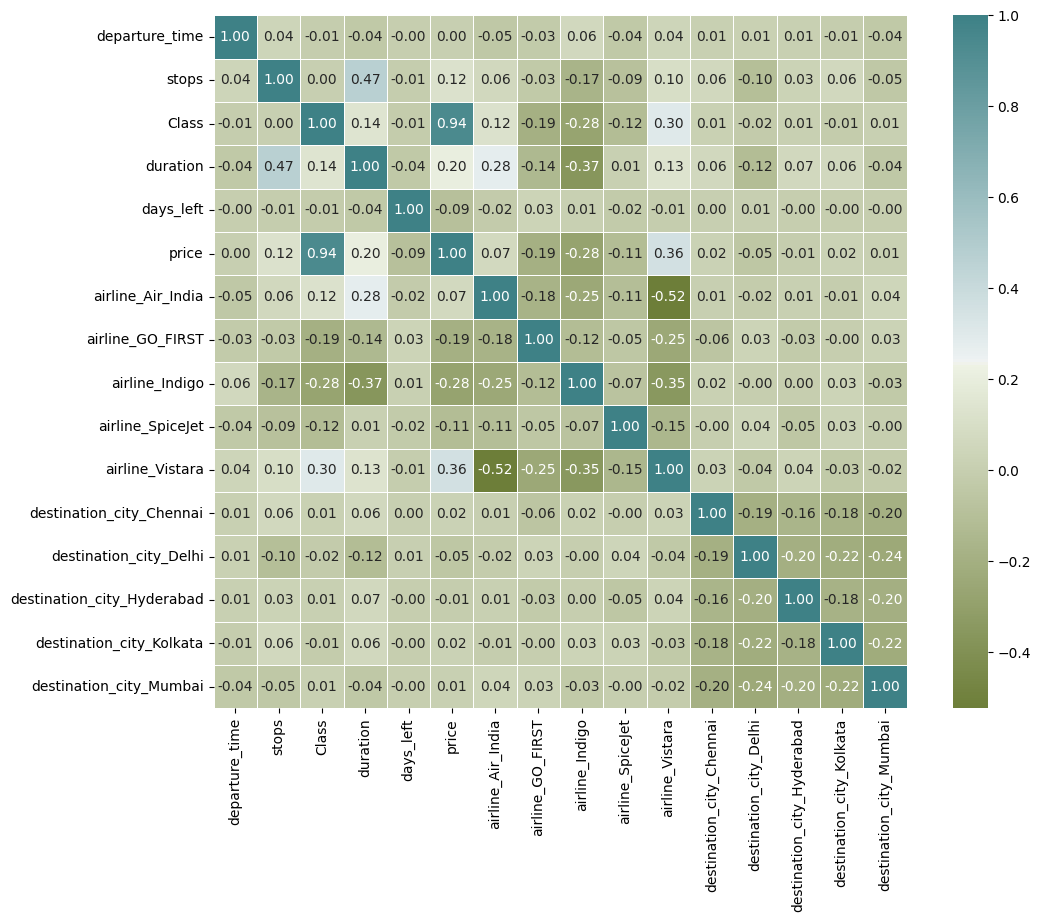

In [123]:


plt.figure(figsize=(12,9))

corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)

In [122]:
data.drop(['source_city_Chennai', 'source_city_Delhi', 'source_city_Hyderabad', 'source_city_Kolkata', 'source_city_Mumbai'], axis=1, inplace=True)
#у каждого города и для прибытия и для отправления была одна и та же корреляция с ценой

In [133]:
data.sample(7)

,departure_time,stops,Class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
129595,2,1,0,6.92,16,3987,False,False,False,False,False,False,False,False,False,True
174160,5,1,0,23.25,31,6485,False,False,False,False,True,False,False,False,True,False
4170,3,1,0,5.83,22,6296,False,False,False,False,True,False,False,False,False,True
180402,5,1,0,11.42,48,6287,False,False,False,False,True,True,False,False,False,False
16654,3,1,0,15.17,34,3357,False,False,False,False,True,False,False,False,False,False
140296,3,1,0,5.17,35,3905,False,False,True,False,False,False,False,False,False,False
63852,0,1,0,16.25,15,10058,False,False,False,False,True,False,False,False,True,False


In [127]:
X = data.copy().drop('price', axis=1)

y = data['price']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=111)

model = LinearRegression()

model.fit(Xtrain, ytrain) 

pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)



In [128]:
mean_squared_error(pred_test, ytest) ** 0.5 

6848.783905911391

In [134]:
mean_squared_error(pred_train, ytrain) ** 0.5 
#я видела, что там разброс цен от 3 до 50 тыс., но все равно кажется, что очень высокая погрешшность

6922.850890349217